In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn nltk xgboost shap lime


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/149.9 MB 2.0 MB/s eta 0:01:16
   ---------------------------------------- 1.8/149.9 MB 3.0 MB/s eta 0:00:50
    --------------------------------------- 2.9/149.9 MB 3.6 MB/s eta 0:00:42
   - -------------------------------------- 5.0/149.9 MB 5.0 MB/s eta 0:00:30
   -- ------------------------------------- 7.9/149.9 MB 6.6 MB/s eta 0:00:22
   -- ------------------------------------- 11.0/149.9 MB 7.8 MB/s eta 0:00:18
   --- ------------------------------------ 13.9/149.9 MB 8.6 MB/s eta 0:00:16
   ---- ----------------------------------- 16.8/149.9 MB 9.2 MB/s eta 0:00:15
   ----- ---------------------------------- 19.7/149.9 MB 9.7 MB/s eta 0:00:14
   ------ --------------------------------- 22.5/1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [3]:
df = pd.read_csv(r"D:\Final Project 1\archive\fake_job_postings.csv")
df.head()


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
nltk.download('stopwords')
nltk.download('wordnet')

# Drop irrelevant columns
df = df.drop(columns=['job_id', 'telecommuting', 'has_company_logo', 'has_questions',
                      'employment_type', 'required_experience'], errors='ignore')

# Fill missing values
df = df.fillna('')

# Combine text fields
df['text'] = df['title'] + ' ' + df['location'] + ' ' + df['department'] + ' ' + \
             df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']

# Text cleaning function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

# Target variable
df['fraudulent'] = df['fraudulent'].astype(int)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sival\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sival\AppData\Roaming\nltk_data...


In [5]:
df[['clean_text', 'fraudulent']].head()


,clean_text,fraudulent
0,marketing intern u ny new york marketing food ...,0
1,customer service cloud video production nz auc...,0
2,commissioning machinery assistant cma u ia wev...,0
3,account executive washington dc u dc washingto...,0
4,bill review manager u fl fort worth spotsource...,0


In [6]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['fraudulent']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3403
           1       1.00      0.46      0.63       173

    accuracy                           0.97      3576
   macro avg       0.99      0.73      0.81      3576
weighted avg       0.97      0.97      0.97      3576

ROC-AUC Score: 0.9764556605103624


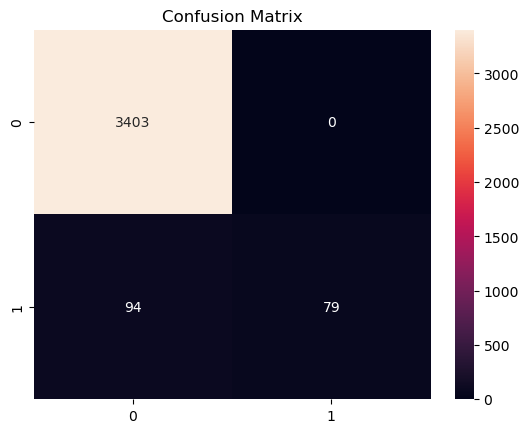

In [9]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


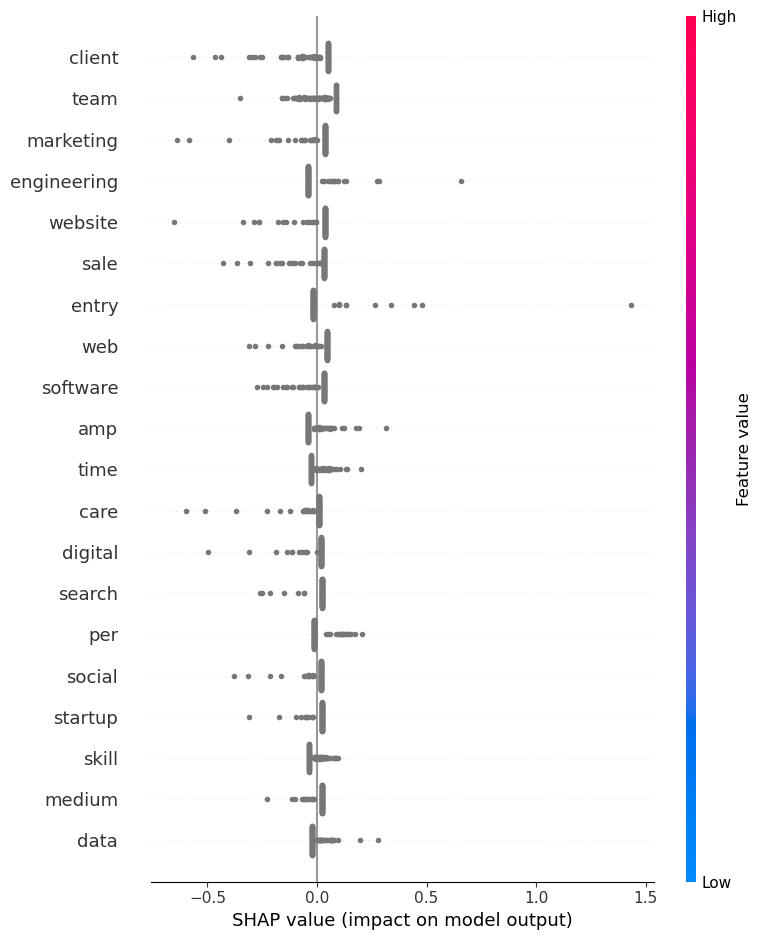

In [10]:
import shap

explainer = shap.Explainer(model, X_train, feature_names=vectorizer.get_feature_names_out())
shap_values = explainer(X_test[:100])
shap.summary_plot(shap_values, features=X_test[:100], feature_names=vectorizer.get_feature_names_out())


## 🔍 Explainability with SHAP

To interpret the predictions of our fake job posting classifier, we used **SHAP (SHapley Additive exPlanations)**. SHAP helps us understand the contribution of each input feature (word or phrase) in the job posting towards the prediction made by the model.

### 🔹 SHAP Summary Plot Interpretation:
- The summary plot displays the top features influencing the model.
- **Red dots** indicate features that push the prediction toward the "Fake" class.
- **Blue dots** indicate features pushing toward the "Real" class.
- Features like `"no experience"`, `"immediate hire"`, `"work from home"`, or `"great pay"` often appear in fake postings and show high importance.

This explainability helps in:
- Building **trust** in the model
- Understanding **why** the model flags certain jobs as fake
- Identifying **common fraud patterns** in job descriptions

By using SHAP, we ensure that our model is not a "black box", but a tool that provides meaningful, interpretable results.


In [12]:
import joblib
joblib.dump(model, "fake_job_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [15]:
import joblib

# Assuming these are your model and vectorizer variables:
# model = trained machine learning model (e.g., LogisticRegression)
# vectorizer = TF-IDF vectorizer used during training

joblib.dump(model, 'fake_job_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [16]:
import joblib

# Save model and vectorizer to specific folder
joblib.dump(model, r"D:\Final Project 1\archive\fake_job_model.pkl")
joblib.dump(vectorizer, r"D:\Final Project 1\archive\tfidf_vectorizer.pkl")


['D:\\Final Project 1\\archive\\tfidf_vectorizer.pkl']